In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Load data
grouped_data_1000 = pd.read_csv('Format/format_avg_pr.csv')
grouped_data_100 = pd.read_csv('Format/format_avg_ir.csv')

van = pd.read_csv('Format/format_prir_van.csv')
ver = pd.read_csv('Format/format_prir_ver.csv')
vic = pd.read_csv('Format/format_prir_vic.csv')
abb = pd.read_csv('Format/format_prir_abb.csv')
camp = pd.read_csv('Format/format_prir_camp.csv')
chill = pd.read_csv('Format/format_prir_chill.csv')
kam = pd.read_csv('Format/format_prir_kam.csv')
kel = pd.read_csv('Format/format_prir_kel.csv')
nana = pd.read_csv('Format/format_prir_nana.csv')
pen = pd.read_csv('Format/format_prir_pen.csv')

sum_health_counts = pd.read_csv('Format/format_sum_health.csv')
sum_nearby_taxi = pd.read_csv('Format/format_sum_taxi.csv')
sum_nearby_parking = pd.read_csv('Format/format_sum_parking.csv')
sum_nearby_station = pd.read_csv('Format/format_sum_station.csv')

indiv_prevalence = pd.read_csv('Format/format_indiv_pr.csv')
indiv_incidence = pd.read_csv('Format/format_indiv_ir,csv')

df_dis_list = pd.read_csv('Format/format_dis_list.csv')

In [182]:
grouped_data_100

,Value,total,prediction
0,11.32,190,9.066129
1,10.32,15,9.319001
2,10.02,17,9.316112
3,9.50,37,9.287212
4,9.26,21,9.310332
5,8.08,25,9.304552
6,8.80,8,9.329116
7,7.24,214,9.031449
8,10.60,21,9.310332
9,7.42,38,9.285767


## ANOVA
To compare the average disease incidence rates between different cities?
-Compare it to the number of facilities of each

In [15]:
# Getting the incidences of each individual city
# This is testing if the means of the groups are different
x1_i = indiv_incidence[indiv_incidence["City"] == 'Abbotsford']
x1_i = x1_i['Value']

x2_i = indiv_incidence[indiv_incidence["City"] == 'Campbell River']
x2_i = x2_i['Value']

x3_i = indiv_incidence[indiv_incidence["City"] == 'Chilliwack']
x3_i = x3_i['Value']

x4_i = indiv_incidence[indiv_incidence["City"] == 'Kamloops']
x4_i = x4_i['Value']

x5_i = indiv_incidence[indiv_incidence["City"] == 'Kelowna']
x5_i = x5_i['Value']

x6_i = indiv_incidence[indiv_incidence["City"] == 'Nanaimo']
x6_i = x6_i['Value']

x7_i = indiv_incidence[indiv_incidence["City"] == 'Penticton']
x7_i = x7_i['Value']

x8_i = indiv_incidence[indiv_incidence["City"] == 'Vancouver']
x8_i = x8_i['Value']

x9_i = indiv_incidence[indiv_incidence["City"] == 'Vernon']
x9_i = x9_i['Value']

x10_i = indiv_incidence[indiv_incidence["City"] == 'Victoria']
x10_i = x10_i['Value']

# Calculating Anova
anova = stats.f_oneway(x1_i,x2_i,x3_i,x4_i,x5_i,x6_i,x7_i,x8_i,x9_i,x10_i)
print(anova.pvalue)

0.9938568343606229


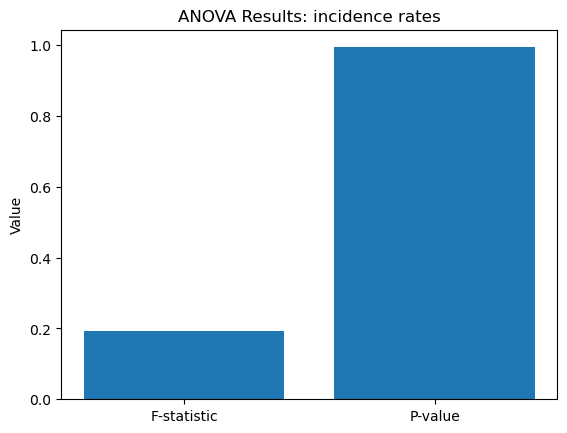

In [16]:
#Bar graph
plt.bar(['F-statistic', 'P-value'], [anova.statistic, anova.pvalue])
plt.title('ANOVA Results: incidence rates')
plt.ylabel('Value')
plt.show()

__No significance difference in means among the groups for incidence rates__

In [4]:
# Getting the prevalances of each individual city
# This is testing if the means of the groups are different
x1_p = indiv_prevalence[indiv_prevalence["City"] == 'Abbotsford']
x1_p = x1_p['Value']

x2_p = indiv_prevalence[indiv_prevalence["City"] == 'Campbell River']
x2_p = x2_p['Value']

x3_p = indiv_prevalence[indiv_prevalence["City"] == 'Chilliwack']
x3_p = x3_p['Value']

x4_p = indiv_prevalence[indiv_prevalence["City"] == 'Kamloops']
x4_p = x4_p['Value']

x5_p = indiv_prevalence[indiv_prevalence["City"] == 'Kelowna']
x5_p = x5_p['Value']

x6_p = indiv_prevalence[indiv_prevalence["City"] == 'Nanaimo']
x6_p = x6_p['Value']

x7_p = indiv_prevalence[indiv_prevalence["City"] == 'Penticton']
x7_p = x7_p['Value']

x8_p = indiv_prevalence[indiv_prevalence["City"] == 'Vancouver']
x8_p = x8_p['Value']

x9_p = indiv_prevalence[indiv_prevalence["City"] == 'Vernon']
x9_p = x9_p['Value']

x10_p = indiv_prevalence[indiv_prevalence["City"] == 'Victoria']
x10_p = x10_p['Value']

# Calculating Anova
anova =  stats.f_oneway(x1_p,x2_p,x3_p,x4_p,x5_p,x6_p,x7_p,x8_p,x9_p,x10_p)
print(anova.pvalue)

0.9997175560670853


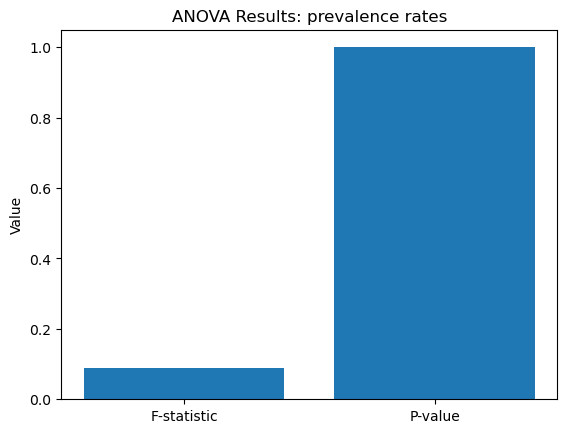

In [14]:
#Bar graph
plt.bar(['F-statistic', 'P-value'], [anova.statistic, anova.pvalue])
plt.title('ANOVA Results: prevalence rates')
plt.ylabel('Value')
plt.show()

__No significance difference in means among the groups for prevalence rates__

## Chi-Squared Test
See if there is a difference in how often certain disease occur in two groups ex: Group A with alot of healthcare facilities and Group B with very few facilities

In [5]:
#Average incidence rate
grouped_data_100

,City,Value,total
0,Abbotsford,11.32,190
1,Campbell River,10.32,15
2,Chilliwack,10.02,17
3,Kamloops,9.50,37
4,Kelowna,9.26,21
5,Nanaimo,8.08,25
6,Penticton,8.80,8
7,Vancouver,7.24,214
8,Vernon,10.60,21
9,Victoria,7.42,38


In [186]:
#Find the median # of healthcare facilities
median = grouped_data_100['total'].median()
#It is 23
#Split into two groups
# True  = # of facilities > median
# False = # of facilities < median
grouped_data_100['>median'] = grouped_data_100['total'] > median
grouped_data_100

,Value,total,prediction,>median
0,11.32,190,9.066129,True
1,10.32,15,9.319001,False
2,10.02,17,9.316112,False
3,9.50,37,9.287212,True
4,9.26,21,9.310332,False
5,8.08,25,9.304552,True
6,8.80,8,9.329116,False
7,7.24,214,9.031449,True
8,10.60,21,9.310332,False
9,7.42,38,9.285767,True


In [187]:
indiv_incidence

,Indicator,Value,City,total
0,Asthma age-standardized incidence rate per 100...,8.2,Abbotsford,190
1,Asthma age-standardized incidence rate per 100...,8.1,Campbell River,15
2,Asthma age-standardized incidence rate per 100...,5.7,Chilliwack,17
3,Asthma age-standardized incidence rate per 100...,6.7,Kamloops,37
4,Asthma age-standardized incidence rate per 100...,6.8,Kelowna,21
5,Asthma age-standardized incidence rate per 100...,6.0,Nanaimo,25
6,Asthma age-standardized incidence rate per 100...,5.8,Penticton,8
7,Asthma age-standardized incidence rate per 100...,5.5,Vancouver,214
8,Asthma age-standardized incidence rate per 100...,6.9,Vernon,21
9,Asthma age-standardized incidence rate per 100...,6.1,Victoria,38


In [188]:
#Create individual tables for each health indicator by seperating indiv_incidence

#Reset indexes for pd.crosstab to work

asthma_ir = indiv_incidence[indiv_incidence['Indicator'] == 'Asthma age-standardized incidence rate per 1000 population (5-54 yrs)']
copd_ir = indiv_incidence[indiv_incidence['Indicator'] == 'Chronic obstructive pulmonary disease (COPD) age-standardized incidence rate per 1000 population (45+ yrs)']
#Adapted from https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
copd_ir.reset_index(drop=True, inplace=True)

diabetes_ir = indiv_incidence[indiv_incidence['Indicator'] == 'Diabetes age-standardized incidence rate per 1000 population (1+ yrs)']

#Adapted from https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
diabetes_ir.reset_index(drop=True, inplace=True)

heart_ir = indiv_incidence[indiv_incidence['Indicator'] == 'Heart failure age-standardized incidence rate per 1000 population (1+ yrs)']

#Adapted from https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
heart_ir.reset_index(drop=True, inplace=True)

ht_ir = indiv_incidence[indiv_incidence['Indicator'] == 'Hypertension age-standardized incidence rate per 1000 population (20+ yrs)']
#Adapted from https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
ht_ir.reset_index(drop=True, inplace=True)

In [189]:
heart_ir

,Indicator,Value,City,total
0,Heart failure age-standardized incidence rate ...,4.1,Abbotsford,190
1,Heart failure age-standardized incidence rate ...,4.2,Campbell River,15
2,Heart failure age-standardized incidence rate ...,4.2,Chilliwack,17
3,Heart failure age-standardized incidence rate ...,3.4,Kamloops,37
4,Heart failure age-standardized incidence rate ...,3.0,Kelowna,21
5,Heart failure age-standardized incidence rate ...,3.4,Nanaimo,25
6,Heart failure age-standardized incidence rate ...,3.3,Penticton,8
7,Heart failure age-standardized incidence rate ...,3.0,Vancouver,214
8,Heart failure age-standardized incidence rate ...,4.3,Vernon,21
9,Heart failure age-standardized incidence rate ...,3.0,Victoria,38


In [190]:
#Create contingency tables for each health indicator
asthma_ct = pd.crosstab(grouped_data_100['>median'],asthma_ir['Value'])
copd_ct = pd.crosstab(grouped_data_100['>median'],copd_ir['Value'])
diabetes_ct = pd.crosstab(grouped_data_100['>median'],diabetes_ir['Value'])
heart_ct = pd.crosstab(grouped_data_100['>median'],heart_ir['Value'])
ht_ct = pd.crosstab(grouped_data_100['>median'],ht_ir['Value'])

In [191]:
#Convert dataframe to list
df_dis_list
dis_list = df_dis_list['Disease'].tolist()
print(dis_list)

['Asthma (5-54) Per 100', 'COPD (45+) Per 100', 'Diabetes (1+) Per 100', 'Heart Failure (1+) Per 100', 'Hypertension (20+) Per 100', 'Asthma (5-54) Per 1000', 'COPD (45+) Per 1000', 'Diabetes (1+) Per 1000', 'Heart Failure (1+) Per 1000', 'Hypertension (20+) Per 1000']


In [192]:
diabetes_ct

Value,4.5,4.9,5.1,5.4,5.6,5.7,6.8,7.6,8.7
>median,,,,,,,,,
False,1,0,1,1,0,0,1,1,0
True,0,1,0,0,2,1,0,0,1


In [193]:
#Perform chi-squared test

#Add all into a list to iterate through
ct_ind = [asthma_ct,copd_ct,diabetes_ct,heart_ct,ht_ct]

#Adapted from https://stackoverflow.com/questions/2984566/how-to-output-an-index-while-iterating-over-an-array-in-python
for idx,ct in enumerate(ct_ind):

    indicator = dis_list[idx]

    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"Chi-squared test for {indicator}:")
    print("p-value:", p)


Chi-squared test for Asthma (5-54) Per 100:
p-value: 0.3504852123233613
Chi-squared test for COPD (45+) Per 100:
p-value: 0.3504852123233613
Chi-squared test for Diabetes (1+) Per 100:
p-value: 0.2650259152973616
Chi-squared test for Heart Failure (1+) Per 100:
p-value: 0.1970065602903466
Chi-squared test for Hypertension (20+) Per 100:
p-value: 0.2650259152973616


__All greater than 0.05, possibly there may not be a significance between a large number of healthcare facilities and the incidence rate of certain disease__

## Mann-Whitney U-Test

In [194]:
x1_i = x1_i.tolist()
x1_i.sort()

x2_i = x2_i.tolist()
x2_i.sort()

x3_i = x3_i.tolist()
x3_i.sort()

x4_i = x4_i.tolist()
x4_i.sort()

x5_i = x5_i.tolist()
x5_i.sort()

x6_i = x6_i.tolist()
x6_i.sort()

x7_i = x7_i.tolist()
x7_i.sort()

x8_i = x8_i.tolist()
x8_i.sort()

x9_i = x9_i.tolist()
x9_i.sort()

x10_i = x10_i.tolist()
x10_i.sort()


In [199]:
#Vancouver vs Penticton
print(stats.mannwhitneyu(x8_i, x7_i).pvalue)

#Vancouver vs Campbell River
print(stats.mannwhitneyu(x8_i, x2_i).pvalue)

#Vancouver vs Chilliwack
print(stats.mannwhitneyu(x8_i, x3_i).pvalue)

#Vancouver vs Vernon
print(stats.mannwhitneyu(x8_i, x9_i).pvalue)

#Vancouver vs Kelowna
print(stats.mannwhitneyu(x8_i, x5_i).pvalue)

#Vancouver vs Nanaimo
print(stats.mannwhitneyu(x8_i, x6_i).pvalue)

#Vancouver vs Kamloops
print(stats.mannwhitneyu(x8_i, x4_i).pvalue)

#Vancouver vs Victoria
print(stats.mannwhitneyu(x8_i, x10_i).pvalue)


#Abbotsford vs Penticton
print(stats.mannwhitneyu(x1_i, x2_i).pvalue)

#Abbotsford vs Campbell River
print(stats.mannwhitneyu(x1_i, x7_i).pvalue)

#Abbotsford vs Chilliwack
print(stats.mannwhitneyu(x1_i, x3_i).pvalue)

#Abbotsford vs Vernon
print(stats.mannwhitneyu(x1_i, x9_i).pvalue)

#Abbotsford vs Kelowna
print(stats.mannwhitneyu(x1_i, x5_i).pvalue)

#Abbotsford vs Nanaimo
print(stats.mannwhitneyu(x1_i, x6_i).pvalue)

#Abbotsford vs Kamloops
print(stats.mannwhitneyu(x1_i, x4_i).pvalue)

#Abbotsford vs Victoria
print(stats.mannwhitneyu(x1_i, x10_i).pvalue)



0.6751736149271245
0.2948019919337048
0.2948019919337048
0.6751736149271245
0.7525671000692723
0.2948019919337048
0.39761475195653073
0.7525671000692723
1.0
0.6904761904761905
0.7532980334628383
0.8412698412698413
0.6904761904761905
0.5476190476190477
0.6904761904761905
0.30952380952380953


In [200]:
x1_p = x1_p.tolist()
x1_p.sort()

x2_p = x2_p.tolist()
x2_p.sort()

x3_p = x3_p.tolist()
x3_p.sort()

x4_p = x4_p.tolist()
x4_p.sort()

x5_p = x5_p.tolist()
x5_p.sort()

x6_p = x6_p.tolist()
x6_p.sort()

x7_p = x7_p.tolist()
x7_p.sort()

x8_p = x8_p.tolist()
x8_p.sort()

x9_p = x9_p.tolist()
x9_p.sort()

x10_p = x10_p.tolist()
x10_p.sort()

In [202]:
#Vancouver vs Penticton
print(stats.mannwhitneyu(x8_p, x7_p).pvalue)

#Vancouver vs Campbell River
print(stats.mannwhitneyu(x8_p, x2_p).pvalue)

#Vancouver vs Chilliwack
print(stats.mannwhitneyu(x8_p, x3_p).pvalue)

#Vancouver vs Vernon
print(stats.mannwhitneyu(x8_p, x9_p).pvalue)

#Vancouver vs Kelowna
print(stats.mannwhitneyu(x8_p, x5_p).pvalue)

#Vancouver vs Nanaimo
print(stats.mannwhitneyu(x8_p, x6_p).pvalue)

#Vancouver vs Kamloops
print(stats.mannwhitneyu(x8_p, x4_p).pvalue)

#Vancouver vs Victoria
print(stats.mannwhitneyu(x8_p, x10_p).pvalue)


#Abbotsford vs Penticton
print(stats.mannwhitneyu(x1_p, x2_p).pvalue)

#Abbotsford vs Campbell River
print(stats.mannwhitneyu(x1_p, x7_p).pvalue)

#Abbotsford vs Chilliwack
print(stats.mannwhitneyu(x1_p, x3_p).pvalue)

#Abbotsford vs Vernon
print(stats.mannwhitneyu(x1_p, x9_p).pvalue)

#Abbotsford vs Kelowna
print(stats.mannwhitneyu(x1_p, x5_p).pvalue)

#Abbotsford vs Nanaimo
print(stats.mannwhitneyu(x1_p, x6_p).pvalue)

#Abbotsford vs Kamloops
print(stats.mannwhitneyu(x1_p, x4_p).pvalue)

#Abbotsford vs Victoria
print(stats.mannwhitneyu(x1_p, x10_p).pvalue)

0.8412698412698413
0.5296192990034517
0.6904761904761905
0.6904761904761905
1.0
1.0
0.6904761904761905
0.9165626446795413
0.834035229790992
0.8412698412698413
0.9165626446795413
1.0
0.6904761904761905
0.8412698412698413
0.8412698412698413
0.6904761904761905
[2.5, 6.1, 10.7, 16.9, 27.3] [1.6, 5.1, 6.8, 12.1, 20.7]


Comparing the 2 areas with drastically more healthcare facilities to all the other locations returned p-values all greater than 0.05 so with this test there is no statistical significance that there was one group sorting higher than the other

Text(0.7, 0.85, 'p-value: 0.8413')

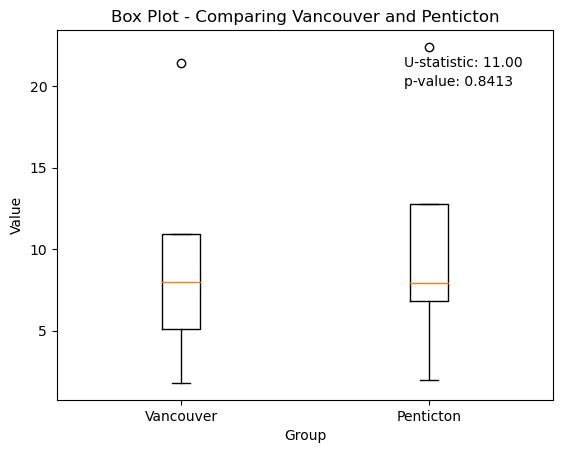

In [37]:
#Vancouver vs Penticton
van_pen = [x8_p,x7_p]
u_stats, pval = stats.mannwhitneyu(x8_p,x7_p)
plt.boxplot(van_pen,labels=['Vancouver','Penticton'])
plt.title('Box Plot - Comparing Vancouver and Penticton')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.7, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.7, 0.85, 'p-value: 0.5296')

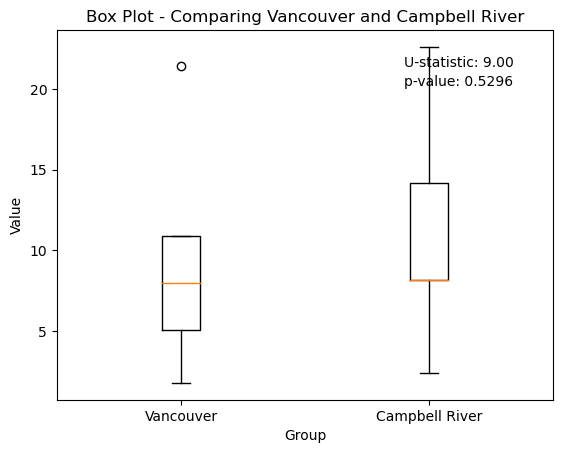

In [36]:
#Vancouver vs Campbell River
#print(stats.mannwhitneyu(x8_p, x2_p).pvalue)
van_cr = [x8_p,x2_p]
u_stats, pval = stats.mannwhitneyu(x8_p,x2_p)
plt.boxplot(van_cr,labels=['Vancouver','Campbell River'])
plt.title('Box Plot - Comparing Vancouver and Campbell River')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.7, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.7, 0.85, 'p-value: 0.6905')

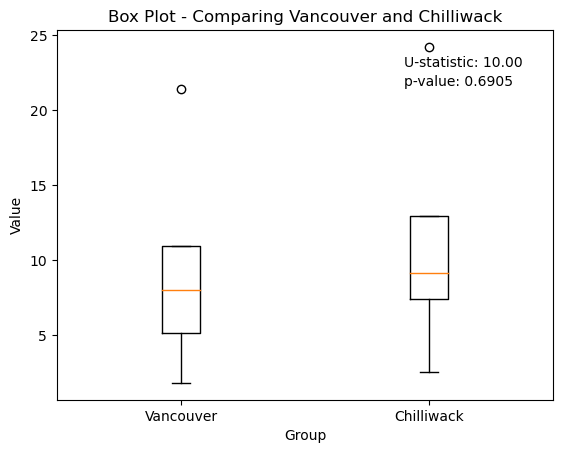

In [35]:
#Vancouver vs Chilliwack
#print(stats.mannwhitneyu(x8_p, x3_p).pvalue)
van_chill = [x8_p,x3_p]
u_stats, pval = stats.mannwhitneyu(x8_p,x3_p)
plt.boxplot(van_chill,labels=['Vancouver','Chilliwack'])
plt.title('Box Plot - Comparing Vancouver and Chilliwack')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.7, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.7, 0.85, 'p-value: 0.6905')

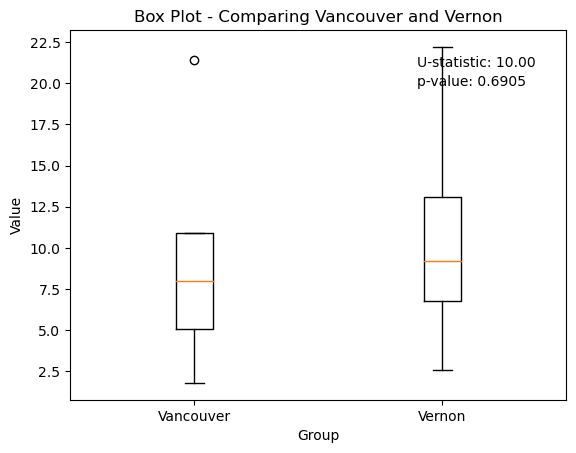

In [33]:
#Vancouver vs Vernon
#print(stats.mannwhitneyu(x8_p, x9_p).pvalue)
van_vern = [x8_p,x9_p]
u_stats, pval = stats.mannwhitneyu(x8_p,x9_p)
plt.boxplot(van_vern,labels=['Vancouver','Vernon'])
plt.title('Box Plot - Comparing Vancouver and Vernon')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.7, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.7, 0.85, 'p-value: 1.0000')

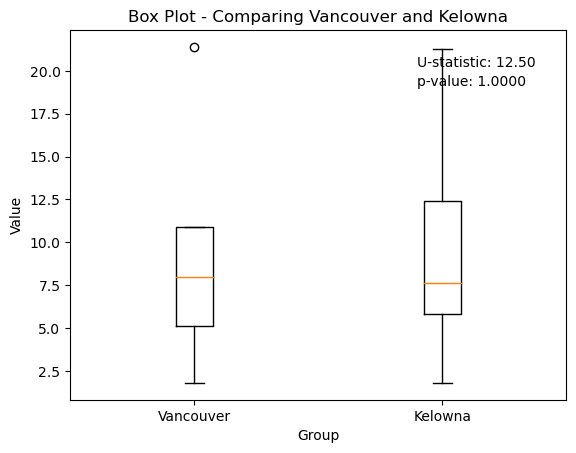

In [34]:
#Vancouver vs Kelowna
#print(stats.mannwhitneyu(x8_p, x5_p).pvalue)
van_kel = [x8_p,x5_p]
u_stats, pval = stats.mannwhitneyu(x8_p,x5_p)
plt.boxplot(van_kel,labels=['Vancouver','Kelowna'])
plt.title('Box Plot - Comparing Vancouver and Kelowna')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.7, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

1.0


Text(0.4, 0.85, 'p-value: 1.0000')

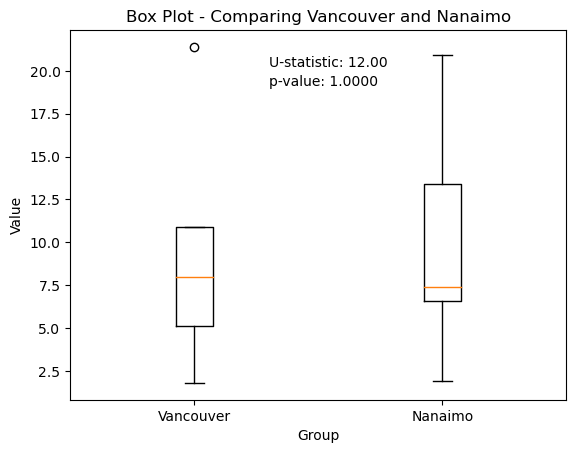

In [48]:
#Vancouver vs Nanaimo
print(stats.mannwhitneyu(x8_p, x6_p).pvalue)
van_nan = [x8_p,x6_p]
u_stats, pval = stats.mannwhitneyu(x8_p,x6_p)
plt.boxplot(van_nan,labels=['Vancouver','Nanaimo'])
plt.title('Box Plot - Comparing Vancouver and Nanaimo')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.4, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.4, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.4, 0.85, 'p-value: 0.9166')

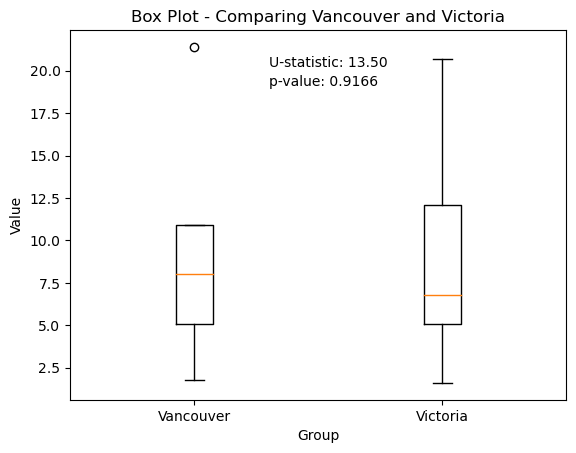

In [46]:
#Vancouver vs Victoria
#print(stats.mannwhitneyu(x8_p, x10_p).pvalue)
van_vic = [x8_p,x10_p]
u_stats, pval = stats.mannwhitneyu(x8_p,x10_p)
plt.boxplot(van_vic,labels=['Vancouver','Victoria'])
plt.title('Box Plot - Comparing Vancouver and Victoria')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.4, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.4, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.7, 0.85, 'p-value: 1.0000')

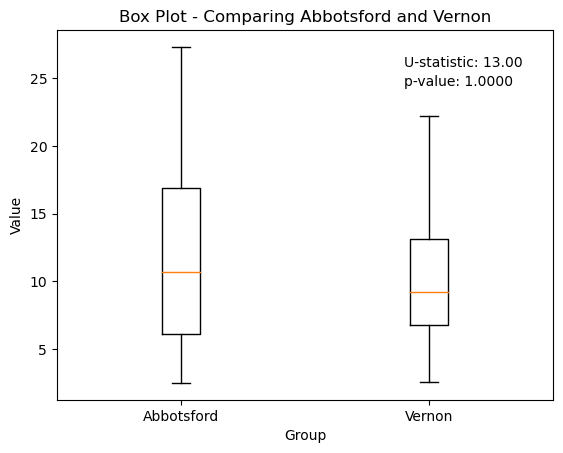

In [42]:
#Abbotsford vs Vernon
#print(stats.mannwhitneyu(x1_p, x9_p).pvalue)
ab_ver = [x1_p,x9_p]
u_stats, pval = stats.mannwhitneyu(x1_p, x9_p)
plt.boxplot(ab_ver,labels=['Abbotsford','Vernon'])
plt.title('Box Plot - Comparing Abbotsford and Vernon')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.7, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.7, 0.85, 'p-value: 0.6905')

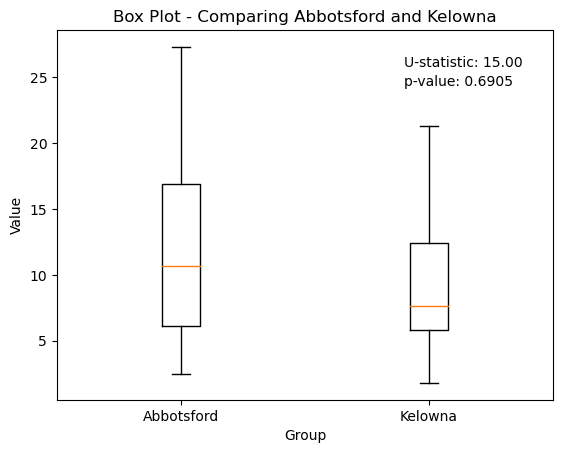

In [40]:
#Abbotsford vs Kelowna
#print(stats.mannwhitneyu(x1_p, x5_p).pvalue)
ab_kel = [x1_p,x5_p]
u_stats, pval = stats.mannwhitneyu(x1_p, x5_p)
plt.boxplot(ab_kel,labels=['Abbotsford','Kelowna'])
plt.title('Box Plot - Comparing Abbotsford and Kelowna')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.7, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.4, 0.85, 'p-value: 0.8413')

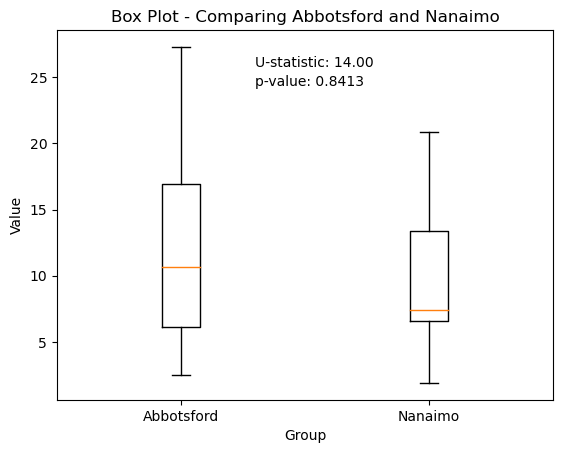

In [50]:
#Abbotsford vs Nanaimo
#print(stats.mannwhitneyu(x1_p, x6_p).pvalue)
ab_nan = [x1_p,x6_p]
u_stats, pval = stats.mannwhitneyu(x1_p, x6_p)
plt.boxplot(ab_nan,labels=['Abbotsford','Nanaimo'])
plt.title('Box Plot - Comparing Abbotsford and Nanaimo')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.4, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.4, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.7, 0.85, 'p-value: 0.8413')

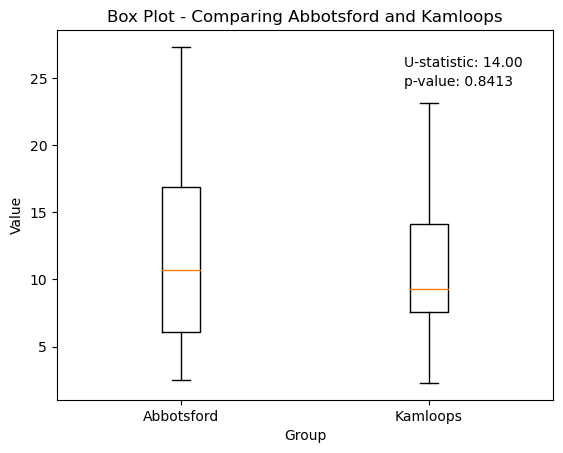

In [38]:
#Abbotsford vs Kamloops
#print(stats.mannwhitneyu(x1_p, x4_p).pvalue)
ab_kam = [x1_p,x4_p]
u_stats, pval = stats.mannwhitneyu(x1_p, x4_p)
plt.boxplot(ab_kam,labels=['Abbotsford','Kamloops'])
plt.title('Box Plot - Comparing Abbotsford and Kamloops')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.7, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)

Text(0.4, 0.85, 'p-value: 0.6905')

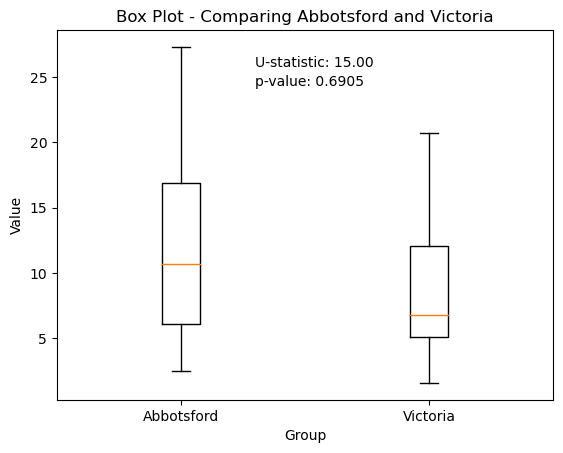

In [49]:
#Abbotsford vs Victoria
ab_vic = [x1_p,x10_p]
u_stats, pval = stats.mannwhitneyu(x1_p, x10_p)
plt.boxplot(ab_vic,labels=['Abbotsford','Victoria'])
plt.title('Box Plot - Comparing Abbotsford and Victoria')
plt.xlabel('Group')
plt.ylabel('Value')
plt.text(0.4, 0.9, f'U-statistic: {u_stats:.2f}', transform=plt.gca().transAxes)
plt.text(0.4, 0.85, f'p-value: {pval:.4f}', transform=plt.gca().transAxes)